# Análise de dados referentes aos alunos do curso de Ciência e Tecnologia da UFRN

Trabalho da disciplina de Probabilidade e Estatística orientado pela professora Kellen.  

### Objetivo

O objetivo do trabalho é fazer uma análise detalhada sobre a situação dos alunos do Curso de Ciência e Tecnologia da UFRN através dos conjuntos de dados disponibilizados pelo portal de dados aberto da UFRN (http://dados.ufrn.br/).


In [4]:
#Imports

import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
#Atalho para o local dos dataset

arquivo = "files/"

alunos = arquivo+ "discentes/"

cet_id = 4885

In [6]:
# Tratamento dos dados

# DataFrame que terá os dados dos ingressantes 
df_ingressantes_cet = pd.DataFrame()


# Juntando todos os dados em um único arquivo

for root, dirs, files in os.walk(alunos):
    for filename in files:
        print(root + filename)
        # Ler arquivo
        df_ingressantes = pd.read_csv((root + filename), sep=';')
        # Filtra pelo curso 
        df_ingressantes_filter = df_ingressantes[df_ingressantes.nome_curso == "CIÊNCIAS E TECNOLOGIA"]
        # Salva no DataFrame que declaramos no início
        df_ingressantes_cet = pd.concat([df_ingressantes_cet, df_ingressantes_filter])

files/discentes/discentes-2009.csv
files/discentes/discentes-2012.csv
files/discentes/discentes-2010.csv
files/discentes/discentes-2016.csv
files/discentes/discentes-2018.csv
files/discentes/discentes-2011.csv
files/discentes/discentes-2017.csv
files/discentes/discentes-2014.csv
files/discentes/discentes-2015.csv
files/discentes/discentes-2013.csv


In [7]:
# Removendo as colunas desnecessárias
df_ingressantes_cet = df_ingressantes_cet.drop(columns=['sigla_nivel_ensino', 'nivel_ensino',
                                  'id_curso', 'nome_curso',
                                  'id_unidade', 'nome_unidade',
                                 'id_unidade_gestora', 'nome_unidade_gestora'])

# Converte colunas que são float, mas deveriam ser int
df_ingressantes_cet.matricula = df_ingressantes_cet.matricula.astype('int64')
df_ingressantes_cet.periodo_ingresso = df_ingressantes_cet.periodo_ingresso.astype('int64')

# Salvar os registros em um CSV
df_ingressantes_cet.to_csv('data/discentes_cet.csv')

# Exibindo os dados
df_ingressantes_cet.head(3)

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,modalidade_educacao
7,2009030800,ABIMAEL SILVA CHIBÉRIO,2009,2,VESTIBULAR,REGULAR,CANCELADO,PRESENCIAL
46,2009028309,ADERALDO ALVES DA SILVA NETO,2009,2,VESTIBULAR,REGULAR,CONCLUÍDO,PRESENCIAL
68,2009030818,ADRIANA CARLA FERNANDES PALHARES,2009,2,VESTIBULAR,REGULAR,CANCELADO,PRESENCIAL


In [8]:
# Todos os bolsistas de iniciação científica
df_bolsistas = pd.read_csv(('files/bolsistas-de-iniciacao-cientifica.csv'), sep=';')

# Filtramos para os que cursam CET
df_bolsistas_cet = df_bolsistas[df_bolsistas.id_unidade == cet_id]

# Removendo as colunas que não serão necessárias
df_bolsistas_cet = df_bolsistas_cet.drop(columns=['Unnamed: 20',
                                  'id_unidade', 'unidade'])

# Salvando o arquivo
df_bolsistas_cet.to_csv('data/bolsistas_cet.csv')


In [9]:
# Exibe o inicio do DataFrame
df_bolsistas_cet.head(3)

,id_discente,matricula,discente,titulo,codigo_projeto,id_projeto_pesquisa,ano,id_orientador,orientador,categoria,tipo_de_bolsa,linha_pesquisa,id_grupo_pesquisa,grupo_pesquisa,cota,inicio,fim,status
10,534594,2010075595,ABNER CARLOS COSTA DE MELO,Susceptibilidade AC Magnetoresistiva,PIJ7964-2013,95105927,2013,5752750,ALEXANDRE BARBOSA DE OLIVEIRA,Iniciação Científica (IC),PROPESQ,INVESTIGAÇÃO DE PROPRIEDADES DE TRANSPORTE ELE...,NaN,NaN,2013,2013-01-13,2013-12-31 00:00:00,PENDENTE DE RELATORIO
11,534594,2010075595,ABNER CARLOS COSTA DE MELO,Estudos das Curvas de Magnetoresistência Pertu...,PIB10530-2014,95040467,2014,5752750,ALEXANDRE BARBOSA DE OLIVEIRA,Iniciação Científica (IC),PROPESQ,Investigação de propriedades elétricas e magné...,NaN,NaN,2014,2014-02-05,2014-12-23 00:00:00,PENDENTE DE RELATORIO
12,534594,2010075595,ABNER CARLOS COSTA DE MELO,CONSTRUÇÃO DE UMA TÉCNICA EXPERIMENTAL PARA ME...,PIJ7964-2012,89219154,2012,5752750,ALEXANDRE BARBOSA DE OLIVEIRA,Iniciação Tecnológica (IT),PROPESQ,INVESTIGAÇÃO DE PROPRIEDADES DE TRANSPORTE ELE...,NaN,NaN,2012,2012-01-01,2012-12-31 00:00:00,FINALIZADO


## Análises


In [10]:
sns.set_context("notebook")

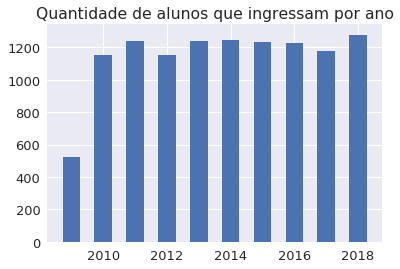

In [19]:
#Forma de ingresso dos alunos

sns.set(font_scale=1.3)
plt.xlabel('')
plt.bar(list(df_ingressantes_cet['ano_ingresso'].unique()), 
        list(df_ingressantes_cet.groupby('ano_ingresso')['matricula'].count()), 1/1.8, align="center")
plt.title('Quantidade de alunos que ingressam por ano')
plt.show()


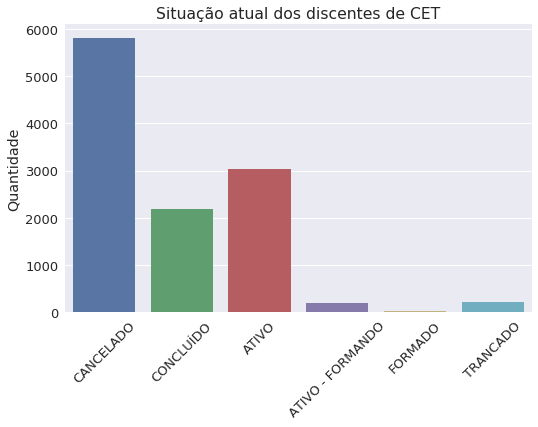

In [20]:
# Criamos um gráfico de barras com a situação de todos os alunos
sns.set(font_scale=1.3)
g = sns.factorplot("status", data=df_ingressantes_cet, kind="count", size=5, aspect=1.5)
g.set_xticklabels(rotation=45)
plt.title('Situação atual dos discentes de CET')
plt.xlabel('')
plt.ylabel('Quantidade')

plt.show()

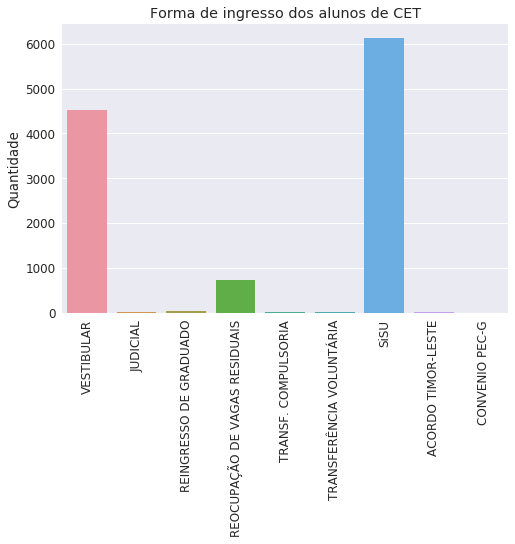

In [33]:
# Forma de ingresso dos alunos

sns.set(font_scale=1.2)
g = sns.factorplot("forma_ingresso", data=df_ingressantes_cet, kind="count", size=5, aspect=1.5
                  )
g.set_xticklabels(rotation=90)
plt.title('Forma de ingresso dos alunos de CET')
plt.xlabel('')
plt.ylabel('Quantidade')

plt.show()

Qual a forma de ingresso dos alunos? Qual o meio mais utilizado para ingressar no CURSO?

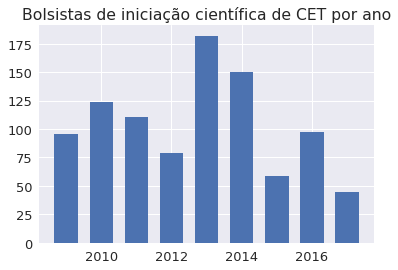

In [17]:
## Qual a quantidade de bolsistas por ano?

# Ordenamos o DataFrame
df_bolsistas_cet = df_bolsistas_cet.sort_values('ano')

# Criamos um gráfico relacionando os anos com os projetos de pesquisas dos alunos do CET
sns.set(font_scale=1.3)
plt.xlabel('')
plt.bar(list(df_bolsistas_cet['ano'].unique()), 
        list(df_bolsistas_cet.groupby('ano')['matricula'].count()), 1/1.5, align="center")
plt.title('Bolsistas de iniciação científica de CET por ano')
plt.show()